Shortest Path Distance: 8 

Shortest Path: 1 -> 3 -> 4 -> 5 -> 7 



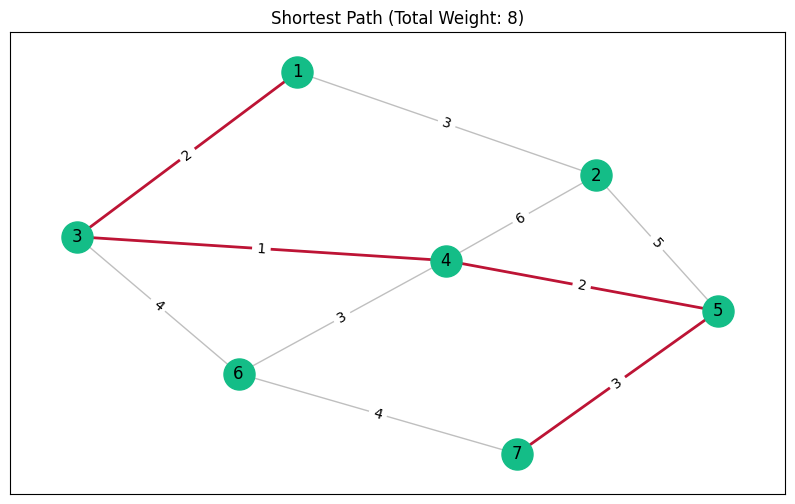

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq


def shortest_path_with_dijkstra(nodes, edges, source, target):
    """
    Solves the shortest path problem using Dijkstra's algorithm.

    Parameters:
    - nodes (list of ints): List of node identifiers.
    - edges (dict): Dictionary with (node1, node2) tuples as keys and weights as values.
    - source (int): The starting node for the shortest path.
    - target (int): The destination node for the shortest path.
    """
    # Create adjacency list for the graph
    graph = {node: [] for node in nodes}
    for (node1, node2), weight in edges.items():
        graph[node1].append((node2, weight))
        graph[node2].append((node1, weight))  # Assuming the graph is undirected

    # Priority queue for Dijkstra's algorithm
    pq = []
    heapq.heappush(pq, (0, source))  # (distance, node)

    # Distance dictionary to store the shortest distances from the source
    distances = {node: float('inf') for node in nodes}
    distances[source] = 0

    # Parent dictionary to reconstruct the shortest path
    parents = {node: None for node in nodes}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If the target node is reached, stop early
        if current_node == target:
            break

        # Explore neighbors of the current node
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                parents[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path
    path = []
    current = target
    while current is not None:
        path.append(current)
        current = parents[current]
    path.reverse()

    # Display the total weight and the shortest path
    print("Shortest Path Distance:", distances[target], "\n")
    print("Shortest Path:", " -> ".join(map(str, path)), "\n")

    # Plot the shortest path for visual understanding
    plot_shortest_path(nodes, edges, path, distances[target])


def plot_shortest_path(nodes, edges, path, total_weight):
    """
    Plots the shortest path in the graph with all edges shown and the shortest path highlighted.

    Parameters:
    - nodes (list): List of node identifiers.
    - edges (dict): All edges with weights.
    - path (list): The shortest path as a list of nodes.
    - total_weight (float): The total weight of the shortest path.
    """
    # Set figure size for better visibility
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed

    # Create a graph and add nodes and edges
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for (node1, node2), weight in edges.items():
        G.add_edge(node1, node2, weight=weight)

    # Extract positions for nodes using a spring layout for visual clarity
    pos = nx.spring_layout(G, seed=42)

    # Draw all edges with light color and thinner lines for background
    nx.draw_networkx_edges(G, pos, edgelist=edges.keys(), width=1, alpha=0.5, edge_color="gray")

    # Highlight the shortest path with a different color and thicker lines
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2, edge_color="#bd1435", label="Shortest Path")

    # Draw nodes with custom size and color for better visibility
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="#14bd87")
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

    # Add edge labels to display the weights
    edge_labels = {edge: f"{weight}" for edge, weight in edges.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Display the plot with title
    plt.title(f"Shortest Path (Total Weight: {total_weight})")
    plt.show()


# Example usage
if __name__ == "__main__":
    nodes = [1, 2, 3, 4, 5, 6, 7]
    edges = {
        (1, 2): 3,
        (1, 3): 2,
        (2, 4): 6,
        (2, 5): 5,
        (3, 4): 1,
        (3, 6): 4,
        (4, 5): 2,
        (5, 7): 3,
        (6, 7): 4,
        (4, 6): 3
        }

    source = 1  # Starting node
    target = 7  # Destination node

    shortest_path_with_dijkstra(nodes, edges, source, target)